In [8]:
import numpy as np
#===
def Compute_X(k_vec,l_vec,x4):
    k1,k2,k3,k4 = k_vec
    L1_0,L2_0,L3_0,L4_0 = l_vec

    A = np.array([[ k1+k2, -k2, 0.],
                  [-k2, k2+k3, -k3],
                  [0., -k3, k3+k4 ]])
    b1 = k1 * L1_0  - k2 * L2_0
    b2 = k2 * L2_0  - k3 * L3_0
    b3 = k3 * L3_0  - k4 * L4_0 + k4 * x4

    b = np.array([b1, b2, b3])
    x_arr = np.linalg.solve(A,b)
    x1,x2,x3 = x_arr
    print ("x1 = %8.3f m"%x1)
    print ("x2 = %8.3f m"%x2)
    print ("x3 = %8.3f m"%x3)
    print ("x4 = %8.3f m"%x4)
    return x_arr
#===
def CheckForce(k_vec,l_vec,x_arr,x4):
    k1,k2,k3,k4 = k_vec
    L1_0,L2_0,L3_0,L4_0 = l_vec
    x1,x2,x3 = x_arr
    F1 = k1 * (x1 - L1_0)
    F2 = k2 * (x2 - x1 - L2_0)
    F3 = k3 * (x3 - x2 - L3_0)
    F4 = k4 * (x4 - x3 - L4_0)
    print ("F1 = %8.3f N"%F1)
    print ("F2 = %8.3f N"%F2)
    print ("F3 = %8.3f N"%F3)
    print ("F4 = %8.3f N"%F4)


#(a)
print ("(a)")
k_vec = [1.0,1.0,1.0,1.0]  # N/m
l_vec = [1.0,1.0,1.0,1.0] # m
x4 = 4.4 #m
x_arr = Compute_X(k_vec,l_vec,x4)
print ("---")
CheckForce(k_vec,l_vec,x_arr,x4)
print ("\n")

#===
#(b)
print ("(b)")
k_vec = [1.0,2.0,1.0,1.0]  # N/m
l_vec = [1.0,1.0,1.0,1.0] # m
x4 = 4.4 #m
x_arr = Compute_X(k_vec,l_vec,x4)
print ("---")
CheckForce(k_vec,l_vec,x_arr,x4)
print ("\n")

#===
#(c)
print ("(c)")
k_vec = [1.0,2.0,1.0,1.0]  # N/m
l_vec = [1.0,1.0,2.0,1.0] # m
x4 = 4.4 #m
x_arr = Compute_X(k_vec,l_vec,x4)
print ("---")
CheckForce(k_vec,l_vec,x_arr,x4)

(a)
x1 =    1.100 m
x2 =    2.200 m
x3 =    3.300 m
x4 =    4.400 m
---
F1 =    0.100 N
F2 =    0.100 N
F3 =    0.100 N
F4 =    0.100 N


(b)
x1 =    1.114 m
x2 =    2.171 m
x3 =    3.286 m
x4 =    4.400 m
---
F1 =    0.114 N
F2 =    0.114 N
F3 =    0.114 N
F4 =    0.114 N


(c)
x1 =    0.829 m
x2 =    1.743 m
x3 =    3.571 m
x4 =    4.400 m
---
F1 =   -0.171 N
F2 =   -0.171 N
F3 =   -0.171 N
F4 =   -0.171 N


In [9]:



def FindBallPosition(k_vec, l_vec,mg_vec):
    #==== Springs ===
    k_01,k_12,k_23,k_34 = k_vec[0],k_vec[1],k_vec[2],k_vec[3] #N/m
    #====
    l_01,l_12,l_23,l_34 = l_vec[0],l_vec[1],l_vec[2],l_vec[3] #meters
    #====External Force ===
    m1_g,m2_g,m3_g,m4_g = mg_vec[0],mg_vec[1],mg_vec[2],mg_vec[3] #N
    #====
    A = np.array([[k_01+k_12, -k_12, 0,  0.],
                  [-k_12, k_12+k_23, -k_23, 0],
                  [0, -k_23, k_23+k_34, -k_34],
                  [ 0.,  0., -k_34, k_34]])
    #===b_vec
    b1 = m1_g + k_01 * l_01 - k_12 * l_12
    b2 = m2_g + k_12 * l_12 - k_23 * l_23
    b3 = m3_g + k_23 * l_23 - k_34 * l_34
    b4 = m4_g + k_34 * l_34
    b_vec = np.array([b1, b2, b3, b4])
    y_vec = np.linalg.solve(A,b_vec)
    return [A,b_vec,y_vec]

#Case I:
k_vec = np.array([1.,2.,1.,1.,]) 
l_vec = np.array([1.,1.,1.,1.,])
mg_vec = np.array([0.1,0.1,0.1,0.1])
#Case II:
#k_vec = np.array([1.,2.,2.,4.,]) 
#l_vec = np.array([1.,1.,1.,1.,])
#mg_vec = np.array([1.,2.,3.,4.])

[A,b_vec,y_vec] = FindBallPosition(k_vec, l_vec,mg_vec)
print("A=",A)
print("b_vec=",b_vec)
print("y_vec=",y_vec)





A= [[ 3. -2.  0.  0.]
 [-2.  3. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  1.]]
b_vec= [-0.9  1.1  0.1  1.1]
y_vec= [1.4  2.55 3.75 4.85]


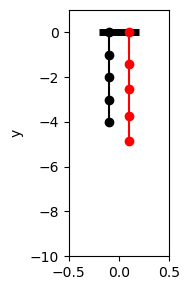

In [11]:
import numpy as np
import matplotlib.pyplot as plt


k_vec = np.array([1.,2.,1.,1.,])  # N/m
l_vec = np.array([1.,1.,1.,1.,]) # meters
mg_vec = np.array([0.1,0.1,0.1,0.1]) # N
[A,b_vec,y_vec] = FindBallPosition(k_vec, l_vec,mg_vec)

fig = plt.figure( dpi = 100 )
fig.set_size_inches(2,3)
#=====
ceiling_y = 0
y1,y2,y3,y4 = -y_vec
#=====
ball_x = np.array([0,0,0,0,0])
ball_y = np.array([ceiling_y,y1,y2,y3,y4])
ball_y0 = np.array([0,-1,-2,-3,-4])
#===
plt.hlines(0, -0.2, 0.2, colors='k',lw = 5)
plt.plot(ball_x - 0.1 , ball_y0,'-ko')
plt.plot(ball_x + 0.1, ball_y,'-ro')
plt.xlim(-0.5,0.5)
plt.ylim(-10,1)
#plt.axis('equal')
plt.ylabel('y')
plt.tight_layout()
plt.savefig("Unit4.8_Mass_Spring_Position.png")

[0.4  0.15 0.2  0.1 ]


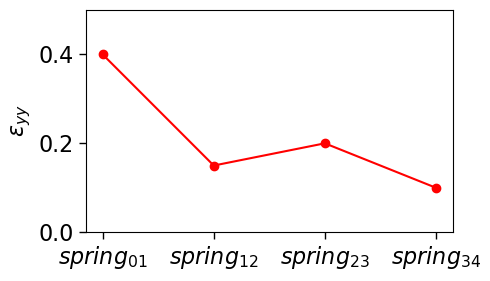

In [28]:
ball_y[0:5]
ball_y[1:5]
ball_y[0:4]
L = abs(ball_y[1:5] - ball_y[0:4])
L0 = np.array([1,1,1,1])
#===
strain_yy = (L - L0)/L0
print (strain_yy)

fig = plt.figure( dpi = 100 )
fig.set_size_inches(5,3)

#plt.plot(strain_yy, '-ro')

Spring_ID = [0,1,2,3]
plt.plot(Spring_ID,strain_yy,'-ro')
plt.xticks(Spring_ID, (r'$spring_{01}$', r'$spring_{12}$', r'$spring_{23}$', r'$spring_{34}$'))

plt.ylabel(r'$\epsilon_{yy}$', fontsize = 16)

plt.ylim(0,0.5)
ax = plt.gca() 
ax.tick_params( 'both', labelsize = 16 , length = 5)
ax.tick_params(width = 1, length = 5)
plt.tight_layout()
plt.savefig("Unit_4.9_Mass_Spring_Strain.png")



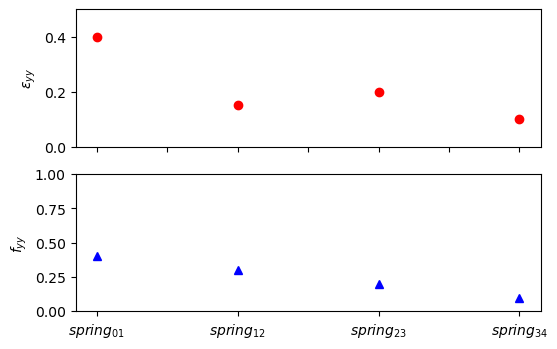

In [31]:
#=====
fig = plt.figure( dpi = 100 )
fig.set_size_inches(6,4)
force_yy = k_vec * strain_yy

#=====
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

#=====
ax1.plot(Spring_ID,strain_yy,'ro')
ax1.set_ylabel(r'$\epsilon_{yy}$')
ax1.set_ylim(0,0.5)

#=====
ax2.plot(Spring_ID,force_yy,'b^')
ax2.set_ylabel(r'$f_{yy}$')
plt.xticks(Spring_ID, (r'$spring_{01}$', r'$spring_{12}$', r'$spring_{23}$', r'$spring_{34}$'))
ax2.set_ylim(0,1)

#=====
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
plt.savefig('Uint1.10_Strain_stress_profile.png')



In [33]:
from vpython import*

scene=canvas(width=300,height=500,center=vec(0,-5,0),background=vec(0.5,0.5,0)) #background color RGB.

ceiling_y = 0
y1 = -1
y2 = -2
y3 = -3
y4 = -4

L_01 = abs(y1-ceiling_y)
L_12 = abs(y2-y1)
L_23 = abs(y3-y2)
L_34 = abs(y4-y3)

spring_01 = helix(pos=vector(0,ceiling_y,0), axis = vector(0,-1,0), length = L_01, radius = 0.1, thickness = 0.05, color = color.black)
spring_12 = helix(pos=vector(0,y1,0), axis = vector(0,-1,0), length = L_12, radius = 0.1, thickness = 0.05, color = color.black)
spring_23 = helix(pos=vector(0,y2,0), axis = vector(0,-1,0), length = L_23, radius = 0.1, thickness = 0.05, color = color.black)
spring_34 = helix(pos=vector(0,y3,0), axis = vector(0,-1,0), length = L_34, radius = 0.1, thickness = 0.05, color = color.black)

ceiling = box(pos=vec(0,ceiling_y,0), size = vec(1, 0.1, 1))
ball_1 = sphere(pos=vec(0,y1,0), radius=0.3, v=vec(0,0,0), color=color.blue)
ball_2 = sphere(pos=vec(0,y2,0), radius=0.3, v=vec(0,0,0), color=color.red)
ball_3 = sphere(pos=vec(0,y3,0), radius=0.3, v=vec(0,0,0), color=color.green)
ball_4 = sphere(pos=vec(0,y4,0), radius=0.3, v=vec(0,0,0), color=color.orange)



ModuleNotFoundError: No module named 'vpython'

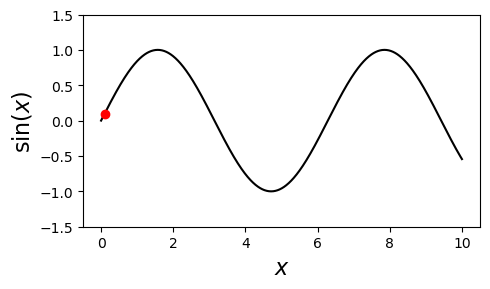

In [35]:
import numpy as np
import matplotlib.pyplot as plt


x_arr = np.linspace(0,10,1001)
x_0 = 0.1



fig = plt.figure(dpi = 100)
fig.set_size_inches(5,3)
plt.plot(x_arr, np.sin(x_arr),'-k')
plt.plot(x_0, np.sin(x_0),'ro')
plt.ylim(-1.5,1.5)
plt.xlabel(r"$x$", fontsize = 16)
plt.ylabel(r"$\sin(x)$", fontsize = 16)
#ax = plt.gca() 
#ax.tick_params('both', labelsize = 20 , length = 5)
#ax.tick_params(width = 1, length = 5)
plt.tight_layout()
plt.savefig("Unit4.12a_dsinx_dx.png")

In [36]:
f_prime = np.cos(x_0)
print ("dsin/dx at x= 0.1 is", f_prime)


dsin/dx at x= 0.1 is 0.9950041652780258


In [39]:
#f_prime_FD = (f(x+h) - f(x))/h








0.9949991719489237


[0.98835914 0.99448842 0.99495408 0.99499917 0.99500367 0.99500412
 0.99500416 0.99500417 0.99500416 0.99500408 0.99500408 0.99500963
 0.99503739 0.99642516 0.99920072 0.97144515]


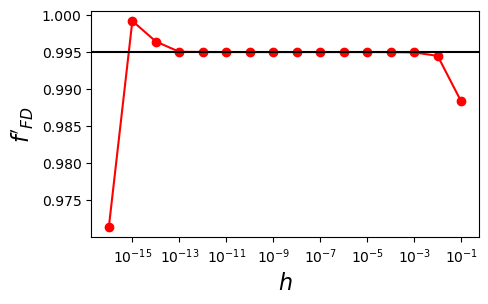

In [53]:
#--- FD method
def FD_Diff(h,x_0):
    f_a = np.sin(x_0)
    f_b = np.sin(x_0 + h)
    ans = 1./h * (f_b - f_a)
    return ans



#---
n_arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
h_arr = 10.** np.array(-n_arr) #...
f_prime_FD = FD_Diff(h_arr,0.1)
print (f_prime_FD)





fig = plt.figure(dpi = 100)

fig.set_size_inches(5,3)

plt.plot(h_arr, f_prime_FD, '-or')
plt.axhline(y=f_prime, color='k', linestyle='-')


plt.xscale('log')


#plt.yscale('log')
plt.xlabel(r"$h$", fontsize = 16)
plt.ylabel(r"$f'_{FD}$", fontsize = 16)


#plt.ylim(0.98,1)
plt.savefig("Unit4.12b_dsinx_dx_FD.png")




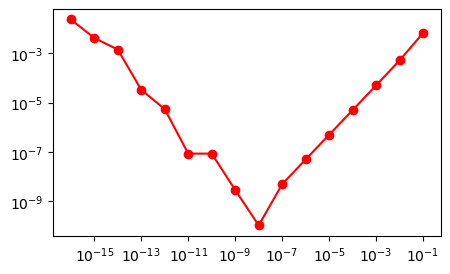

In [54]:


Delta = abs(f_prime_FD - f_prime)


#print (Delta)
fig = plt.figure(dpi = 100)
fig.set_size_inches(5,3)

plt.plot(h_arr, Delta, '-or')

plt.xscale('log')
plt.yscale('log')


